In [2]:
# 라이브러리 import
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [12]:
# csv 데이터 파일 불러오기
dataset = pd.read_csv('pima-indians-diabetes.csv')
dataset_np = dataset.to_numpy()
print(dataset.head(10))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   2

{'whiskers': [<matplotlib.lines.Line2D at 0x1c06b579eb8>,
 'caps': [<matplotlib.lines.Line2D at 0x1c06b582828>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c06b579d68>],
 'medians': [<matplotlib.lines.Line2D at 0x1c06b582eb8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c06b582f98>],
 'means': []}

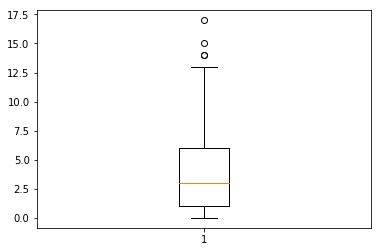

In [13]:
plt.boxplot(dataset.iloc[:,0])

In [14]:
idx=dataset_np[:,0]>14
print(dataset_np[idx,:])

[[1.50e+01 1.36e+02 7.00e+01 3.20e+01 1.10e+02 3.71e+01 1.53e-01 4.30e+01
  1.00e+00]
 [1.70e+01 1.63e+02 7.20e+01 4.10e+01 1.14e+02 4.09e+01 8.17e-01 4.70e+01
  1.00e+00]]


{'whiskers': [<matplotlib.lines.Line2D at 0x1c06b5e1358>,
 'caps': [<matplotlib.lines.Line2D at 0x1c06b5e19e8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c06b5d5f28>],
 'medians': [<matplotlib.lines.Line2D at 0x1c06b5e1e10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c06b5ec400>],
 'means': []}

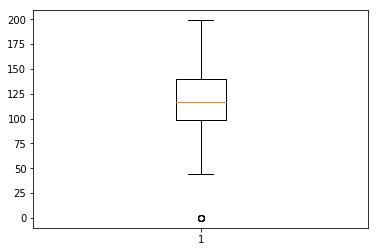

In [15]:
plt.boxplot(dataset.iloc[:,1])

(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <a list of 10 Patch objects>)

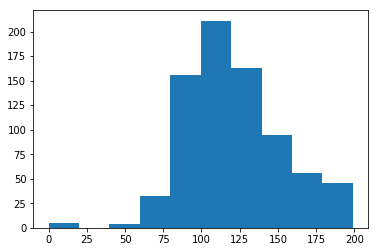

In [16]:
x = np.array(dataset.iloc[:,1])
plt.hist(x)


In [6]:
# Advanced methods to detect outliers
#1. https://www.hs.uni-hamburg.de/DE/Ins/Per/Czesla/PyA/PyA/pyaslDoc/aslDoc/outlier.html
#2. https://pyod.readthedocs.io/en/latest/examples.html
#3. http://scikit-learn.org/stable/modules/outlier_detection.html#outlier-detection

In [17]:
# Local outlier factor
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=5)
is_outlier = clf.fit_predict(dataset_np) # 1: inliers, -1: outliers
negative_score = clf.negative_outlier_factor_ # larger values coorespond to inliers

In [18]:
# print(dataset_np.shape)
# print(is_outlier.shape)
# print(score.shape)
# print(score)
# print(is_outlier[1:20])
print(negative_score[1:20])

[-1.07146078 -1.07883436 -1.0310752  -1.11732585 -0.99069593 -1.22641872
 -1.03697371 -1.06901585 -2.02181104 -1.07298782 -0.99488582 -0.9762427
 -2.64810151 -0.99599136 -0.99850927 -1.05754563 -0.96079492 -1.57900219
 -0.95143244]


In [19]:
print(negative_score[is_outlier==-1])

[-2.02181104 -2.64810151 -1.57900219 -1.57345638 -1.51579769 -2.16372615
 -1.56635528 -1.78537687 -2.40748557 -1.94367835 -1.73897321 -2.11888932
 -1.77709204 -1.56828563 -1.63870635 -1.90191266 -1.73042411 -1.86676935
 -1.64968298 -1.70060822 -1.62621066 -2.24469907 -1.50564847 -1.94511094
 -1.53664638 -1.69342669 -1.65667438 -1.53882333 -1.50967493 -2.52920167
 -1.68348212 -1.93764397 -1.80216271 -1.69772026 -1.66028555 -1.56250708]


In [20]:
# the most confident outlier based on local outlier factor
print(dataset_np[negative_score==negative_score.min(),:]) 

[[1.00e+00 1.89e+02 6.00e+01 2.30e+01 8.46e+02 3.01e+01 3.98e-01 5.90e+01
  1.00e+00]]


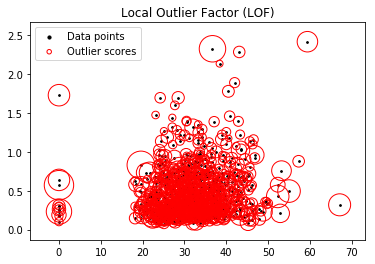

In [21]:
import matplotlib.pyplot as plt

plt.title("Local Outlier Factor (LOF)")
plt.scatter(dataset_np[:, 5], dataset_np[:, 6], color='k', s=3., label='Data points')
# plot circles with radius proportional to the outlier scores
radius = (negative_score.max() - negative_score) / (negative_score.max() - negative_score.min())
plt.scatter(dataset_np[:, 5], dataset_np[:, 6], s=1000 * radius, edgecolors='r',
            facecolors='none', label='Outlier scores')
plt.axis('tight')
legend = plt.legend(loc='upper left')
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]

plt.show()
